In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
rnd_index = np.arange(train_labels.shape[0])
np.random.shuffle(rnd_index)
n_datasets = 120
ni = int(np.shape(train_labels)[0]/n_datasets)
train_images = train_images[rnd_index,:,:]
train_labels = train_labels[rnd_index]
train_images = np.reshape(train_images,(n_datasets,ni,28,28))
train_labels = np.reshape(train_labels,(n_datasets,ni))
print(ni)

500


In [5]:
def reinitialize(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))

In [6]:
epochs = 100
CEs = np.zeros(n_datasets)
CEp = np.zeros(n_datasets)
Rp_s = np.zeros(n_datasets)
Rp_h = np.zeros(n_datasets)
Rs_s = np.zeros(n_datasets)
Rs_h = np.zeros(n_datasets)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4))
for j in range(n_datasets):
  reinitialize(model)
  h = model.fit(x=train_images[j,:,:,:], y=train_labels[j,:], batch_size = 64, epochs=epochs)

  CEs[j],A = model.evaluate(x=train_images[j,:,:,:], y=train_labels[j,:])
  Rs_h[j] = 1.0-A
  predicciones = model.predict(train_images[j,:,:,:])
  lista = [predicciones[k,train_labels[j,k]] for k in range(np.shape(predicciones)[0])]
  Rs_s[j] = 1.0-np.mean(np.array(lista))

  CEp[j],A = model.evaluate(x=test_images, y=test_labels)
  Rp_h[j] = 1.0-A
  predicciones = model.predict(test_images)
  lista = [predicciones[k,test_labels[k]] for k in range(np.shape(predicciones)[0])]
  Rp_s[j] = 1.0-np.mean(np.array(lista))

#from google.colab import drive
#drive.mount('/content/drive')
#np.savez('/content/drive/My Drive/rta2712.npz', CEs = CEs, CEp = CEp, Rp_s = Rp_s, Rp_h = Rp_h, Rs_s = Rs_s, Rs_h = Rs_h)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Se han truncado las últimas 5000 líneas del flujo de salida.
8/8 [==============================] - 0s 6ms/step - loss: 5.1744e-04 - accuracy: 1.0000
Epoch 52/100
8/8 [==============================] - 0s 6ms/step - loss: 5.0395e-04 - accuracy: 1.0000
Epoch 53/100
8/8 [==============================] - 0s 6ms/step - loss: 4.9172e-04 - accuracy: 1.0000
Epoch 54/100
8/8 [==============================] - 0s 6ms/step - loss: 4.7883e-04 - accuracy: 1.0000
Epoch 55/100
8/8 [==============================] - 0s 6ms/step - loss: 4.6781e-04 - accuracy: 1.0000
Epoch 56/100
8/8 [==============================] - 0s 6ms/step - loss: 4.5601e-04 - accuracy: 1.0000
Epoch 57/100
8/8 [==============================] - 0s 7ms/step - loss: 4.4579e-04 - accuracy: 1.0000
Epoch 58/100
8/8 [==============================] - 0s 7ms/step - loss: 4.3620e-04 - accuracy: 1.0000
Epoch 59/100
8/8 [==============================] - 0s 8ms/step - loss: 4.2551e-04 - accuracy: 1.0000
Epoch 60/100
8/8 [================

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')
#npzfile = np.load('/content/drive/My Drive/rta2712.npz')
#CEs = npzfile["CEs"]
#CEp = npzfile["CEp"]
#Rp_s = npzfile["Rp_s"]
#Rp_h = npzfile["Rp_h"]
#Rs_s = npzfile["Rs_s"]
#Rs_h = npzfile["Rs_h"]

CEtilde = -np.log(1.0-Rp_s)
gen = CEtilde-CEs
n_datasets = np.shape(CEs)[0]

In [9]:
pts=10000
tmin=1e-5
tmax=1000
nmax = 18 # de deltas
Cn = np.zeros(pts)
cota = np.zeros((pts,nmax))
cuantil = np.zeros(nmax)
cuantil01 = np.zeros(nmax)
for idx, t in enumerate(np.linspace(tmin,tmax,pts)):
  Cn[idx]=np.mean(np.exp(t*(CEtilde-CEs)))
  for nd in range(1,nmax+1):
    delta = nd / n_datasets
    cuantil[nd-1] = np.sort(gen)[n_datasets-nd-1]
    cota[idx,nd-1] = np.log(Cn[idx]/delta) / t
    cuantil01[nd-1] = np.sort(Rp_h-Rs_h)[n_datasets-nd-1]


Text(0, 0.5, 'Generalization gap')

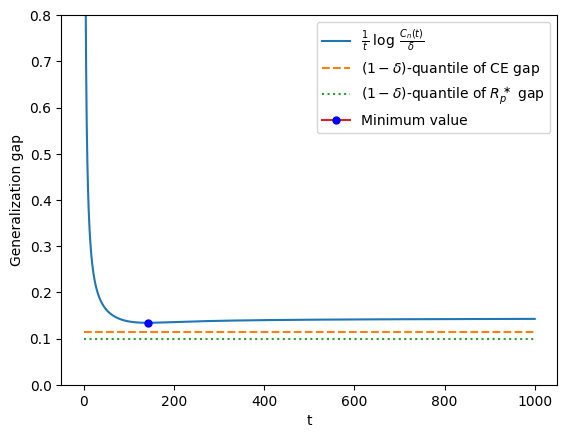

In [10]:
minimo = np.min(cota[:,5])
donde = np.argmin(cota[:,5])

ejex = np.linspace(tmin,tmax,pts)
fig, ax = plt.subplots()
ax.plot(ejex,cota[:,5],label = r'$\frac{1}{t}\;\log\;\frac{C_n(t)}{\delta}$') #delta=0.05
ax.plot([tmin,tmax],[cuantil[5],cuantil[5]], label = r'$(1-\delta)$-quantile of CE gap',linestyle='dashed')
ax.plot([tmin,tmax],[cuantil01[5],cuantil01[5]], label = r'$(1-\delta)$-quantile of $R_p^\ast$ gap',linestyle='dotted')
plt.plot(ejex[donde], minimo, marker="o", markersize=5, markeredgecolor="blue", markerfacecolor="blue",label = "Minimum value")
ax.legend()
plt.ylim((0,0.8))
ax.set_xlabel("t")
ax.set_ylabel("Generalization gap")

#plt.savefig("cnvst.pdf")
#from google.colab import files
#files.download('cnvst.pdf')